# Visualization of Nationwide Groundwater Depletion Rates 

The dataset is downloaded from USGS website available [here](https://water.usgs.gov/GIS/metadata/usgswrd/XML/sir2013-5079_Groundwater_Depletion.xml). This dataset contains the average depletion rates over 2001 to 2008. A natural consequence of groundwater withdrawals is the removal of water from subsurface storage. The dataset charachterizes long-term cumulative depletion volumes in 40 separate aquifers or areas and one land use category in the United States. Depletion is directly calculated using calibrated groundwater models, analytical approaches, or volumetric budget analyses for multiple aquifer systems. Estimated groundwater depletion in the United States during 1900–2008 totals approximately 1,000 cubic kilometers (km3).
      

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # using the style of popular R package ggplot

Importing data:

In [2]:
df = pd.read_excel("depletion_avgrate(2001-2008).xls")
df.head()

,aquif_id,Area (or subarea) Name,map_id,Size of Area (km^2),GW Depl avg rate (km^3/yr)2001-2008,lat,lng
0,acp_gafl,Georgia & northeast Florida,1,66534,0.000,NaN,NaN
1,acp_li,"Long Island, New York",2,3380,-0.053,40.809274,-73.207837
2,acp_mdde,Maryland and Delaware,3,18489,0.042,38.703696,-75.729839
3,acp_nj,New Jersey,4,11614,0.000,NaN,NaN
4,acp_nc,North Carolina,5,55901,0.053,35.740053,-79.681653


Changing column names:

In [3]:
df.columns = ['id', 'name', 'map_id', 'size', 'depl', 'lat', 'lng']
df.head(1)

,id,name,map_id,size,depl,lat,lng
0,acp_gafl,Georgia & northeast Florida,1,66534,0.0,NaN,NaN


We remove entries whose depletion rates are zero or their longitude and latitude is not available.

In [4]:
df = df[(df['depl'] != 0)]
df = df[(df['lat'].notnull() & df['lng'].notnull() )]
df.head(3)

,id,name,map_id,size,depl,lat,lng
1,acp_li,"Long Island, New York",2,3380,-0.053,40.809274,-73.207837
2,acp_mdde,Maryland and Delaware,3,18489,0.042,38.703696,-75.729839
4,acp_nc,North Carolina,5,55901,0.053,35.740053,-79.681653


let's get a closer look at depletion rates by visualizing them in a bar plot.

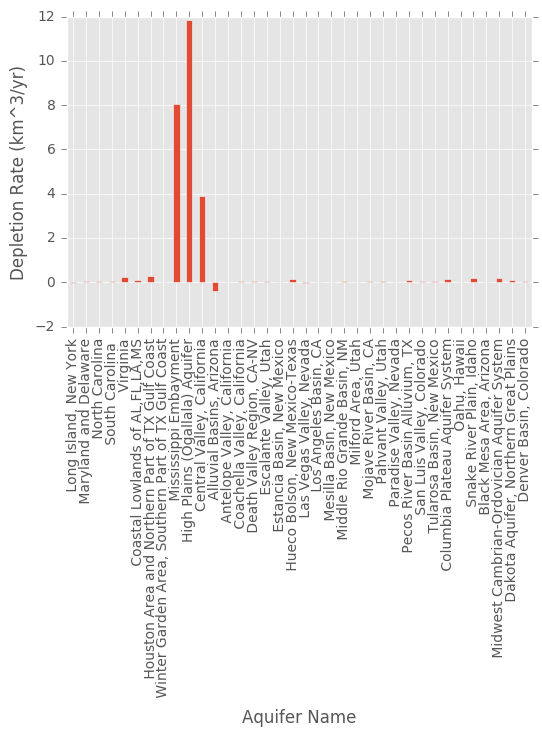

In [5]:
depletion = df.depl.copy(deep=True)
depletion.index = df.name
depletion.plot(kind='bar')
plt.xlabel("Aquifer Name"); plt.ylabel("Depletion Rate (km^3/yr)")
plt.show()

From this plot we observe that: 
* Three aquifers have a very higher depletion rate compare to others. 
* Some aquifers have negative depletion rates. It means their storage has increases. 

For a better visualization, we remove the three aquifers that have the highest depleton rate.

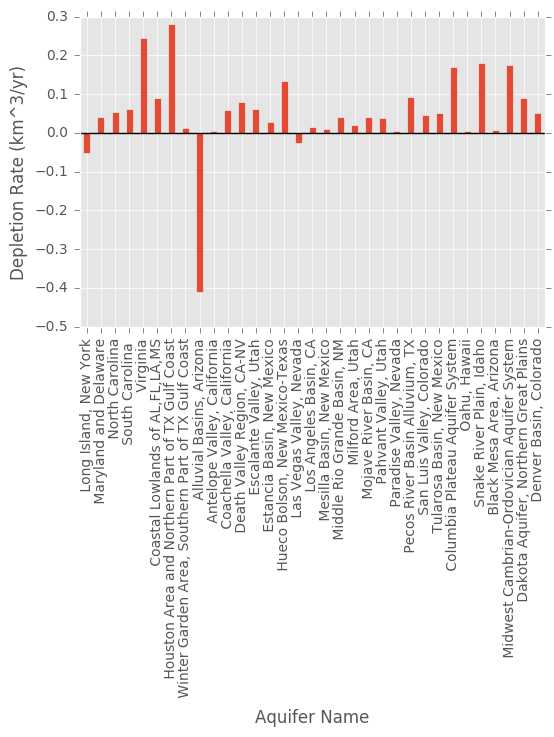

In [6]:
# filtering out three rows with the highest depletion rates
top3 = depletion.nlargest(3)
depletion_filtered = depletion[-depletion.isin(top3)] 
depletion_filtered.plot(kind='bar')
plt.axhline(0, color='k')
plt.xlabel("Aquifer Name"); plt.ylabel("Depletion Rate (km^3/yr)")
plt.show()

Now, we visualize the data on Google map. For this purspose, we want to use different colors based on values of depletion rates. 

In [7]:
# we plan to set the colors on the map based on HSL (Hue, Saturation, Lightness)
# for more info on HSL see: https://www.w3schools.com/colors/colors_hsl.asp
# initialize columns in dataframe for colors
df['color_h'] = np.nan; df['color_s'] = 100; df['color_l'] = np.nan

In [8]:
df.loc[df.depl.isin(top3),'color_l'] =[55,50,65] #setting the lightness of three top rows
df.loc[df.depl.isin(top3),'color_h'] =[0,0,0] #setting the hue of three top rows
# setting the whiteness for other "postive" rows
depl_p = df.loc[( (df.depl>0) & (df.depl< top3.iloc[2]) ),'depl'] 
df.loc[( (df.depl>0) & (df.depl< top3.iloc[2]) ),'color_h'] = 0

In [9]:
# assigning colors based on depletion rates
maxp = depl_p.max() 
minp = depl_p.min()
normalizep = lambda x: -((x-minp)/(maxp-minp))*20 + 90
df.loc[( (df.depl>0) & (df.depl< top3.iloc[2]) ),'color_l'] = depl_p.apply(normalizep)

In [10]:
# setting the whiteness for "negative" rows
df.loc[( df.depl<0 ),'color_h'] = 200
df.loc[(df.depl<0) ,'color_l'] =[85,65,92]

In [11]:
# write the new modified data, in a new excel file:
df.to_excel("final.xlsx")

The new dataframe looks like this: 

In [12]:
df

,id,name,map_id,size,depl,lat,lng,color_h,color_s,color_l
1,acp_li,"Long Island, New York",2,3380,-0.053,40.809274,-73.207837,200.0,100,85.000000
2,acp_mdde,Maryland and Delaware,3,18489,0.042,38.703696,-75.729839,0.0,100,87.309091
4,acp_nc,North Carolina,5,55901,0.053,35.740053,-79.681653,0.0,100,86.509091
5,acp_sc,South Carolina,6,48931,0.062,34.025142,-81.182103,0.0,100,85.854545
6,acp_va,Virginia,7,18761,0.244,37.518243,-78.699193,0.0,100,72.618182
7,gcp_colow,"Coastal Lowlands of AL,FL,LA,MS",8,140056,0.090,30.135412,-91.333470,0.0,100,83.818182
8,gcp_northtx,Houston Area and Northern Part of TX Gulf Coast,9,50157,0.280,29.348492,-95.190700,0.0,100,70.000000
10,gcp_wg,"Winter Garden Area, Southern Part of TX Gulf ...",11,35571,0.012,27.480642,-98.769052,0.0,100,89.490909
11,gcp_me,Mississippi Embayment,12,201483,8.048,33.900246,-90.948335,0.0,100,55.000000
12,hpa,High Plains (Ogallala) Aquifer,13,461471,11.830,39.907490,-100.894510,0.0,100,50.000000


We eventually used Python to generate the following HTML file. Python scripts can be found `here`

In [13]:
import IPython
url = 'https://cdn.rawgit.com/moslehi/groundwater-visualization/master/output-depletion.html'
iframe = '<iframe src=' + url + ' width=900 height=525></iframe>'
IPython.display.HTML(iframe)

In the above map, if you mouse over the points, you will see details such as aquifers' name and depletion rates. 